In [79]:
import cv2
import glob
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pathlib 
import os
import random
import shutil

from os import walk, makedirs
from os.path import exists
from PIL import Image
from zipfile import ZipFile 

In [23]:
current_dir = os.getcwd().replace("\\","/")
data_directory = current_dir+'/data'

try: ## vérifier si un dossier data existe déjà (sinon, le créer) et le prendre comme répertoire courant afin d'y faire les téléchargements
    os.makedirs(data_directory) ##former le dossier data
    os.chdir(data_directory)
except :
    os.chdir(data_directory) 

##le code précédent va créer un répertoire data dans le répertoire current_dir grâce au chemin data_directory. Si on ne veut pas cela on peut créer le dossier data dans le répertoire parent en procédant comme suit:
#parent_directory = current_dir.replace('/'+os.path.basename(current_dir),"") ##former le dossier parent
#os.chdir(parent_directory)
#data_directory = parent_directory+'/data'
##puis exécuter le bloc try ...

##téléchargement
!curl -O https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TrainIJCNN2013.zip
!curl -O https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/TestIJCNN2013.zip
!curl -O https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/gt.txt

##dézipper
from zipfile import ZipFile

with ZipFile('TrainIJCNN2013.zip', 'r') as dezip:
    dezip.extractall('TrainIJCNN2013')
    
with ZipFile('TestIJCNN2013.zip', 'r') as dezip:
    dezip.extractall('TestIJCNN2013')


os.chdir(current_dir) ##retouner au précedent repertoire courant

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1053M    0 32768    0     0  36859      0  8:19:16 --:--:--  8:19:16 36859
  0 1053M    0  480k    0     0   256k      0  1:10:05  0:00:01  1:10:04  256k
  0 1053M    0 1152k    0     0   405k      0  0:44:20  0:00:02  0:44:18  405k
  0 1053M    0 2544k    0     0   662k      0  0:27:08  0:00:03  0:27:05  662k
  0 1053M    0 4016k    0     0   829k      0  0:21:39  0:00:04  0:21:35  829k
  0 1053M    0 5584k    0     0   956k      0  0:18:47  0:00:05  0:18:42 1121k
  0 1053M    0 7248k    0     0  1059k      0  0:16:58  0:00:06  0:16:52 1360k
  0 1053M    0 9408k    0     0  1199k      0  0:14:58  0:00:07  0:14:51 1651k
  1 1053M    1 11.4M    0     0  1322k      0  0:13:35  0:00:08  0:13:27 1830k
  1 1053M    1 13.7M    0     0  1433k      0  0:12

 72 1053M   72  767M    0     0  2449k      0  0:07:20  0:05:20  0:02:00 1902k
 73 1053M   73  769M    0     0  2449k      0  0:07:20  0:05:21  0:01:59 1964k
 73 1053M   73  772M    0     0  2448k      0  0:07:20  0:05:22  0:01:58 2058k
 73 1053M   73  773M    0     0  2446k      0  0:07:20  0:05:23  0:01:57 2014k
 73 1053M   73  775M    0     0  2446k      0  0:07:20  0:05:24  0:01:56 2099k
 73 1053M   73  777M    0     0  2444k      0  0:07:21  0:05:25  0:01:56 2109k
 74 1053M   74  779M    0     0  2443k      0  0:07:21  0:05:26  0:01:55 2089k
 74 1053M   74  782M    0     0  2442k      0  0:07:21  0:05:27  0:01:54 2069k
 74 1053M   74  784M    0     0  2442k      0  0:07:21  0:05:28  0:01:53 2183k
 74 1053M   74  786M    0     0  2442k      0  0:07:21  0:05:29  0:01:52 2211k
 74 1053M   74  789M    0     0  2442k      0  0:07:21  0:05:30  0:01:51 2300k
 75 1053M   75  791M    0     0  2442k      0  0:07:21  0:05:31  0:01:50 2340k
 75 1053M   75  794M    0     0  2443k      0  0:07:

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  529M    0  304k    0     0   523k      0  0:17:17 --:--:--  0:17:17  523k
  0  529M    0 2464k    0     0  1594k      0  0:05:40  0:00:01  0:05:39 1594k
  0  529M    0 5120k    0     0  1988k      0  0:04:32  0:00:02  0:04:30 1988k
  1  529M    1 8160k    0     0  2186k      0  0:04:08  0:00:03  0:04:05 2186k
  1  529M    1 10.5M    0     0  2372k      0  0:03:48  0:00:04  0:03:44 2372k
  2  529M    2 13.3M    0     0  2464k      0  0:03:40  0:00:05  0:03:35 2691k
  3  529M    3 16.5M    0     0  2579k      0  0:03:30  0:00:06  0:03:24 2883k
  3  529M    3 19.4M    0     0  2632k      0  0:03:26  0:00:07  0:03:19 2964k
  4  529M    4 22.4M    0     0  2692k      0  0:03:21  0:00:08  0:03:13 3084k
  4  529M    4 25.8M    0     0  2769k      0  0:03

 82  529M   82  434M    0     0  1570k      0  0:05:45  0:04:43  0:01:02 1110k
 82  529M   82  435M    0     0  1568k      0  0:05:46  0:04:44  0:01:02  953k
 82  529M   82  436M    0     0  1565k      0  0:05:46  0:04:45  0:01:01  846k
 82  529M   82  437M    0     0  1563k      0  0:05:47  0:04:46  0:01:01  875k
 82  529M   82  438M    0     0  1562k      0  0:05:47  0:04:47  0:01:00  952k
 82  529M   82  439M    0     0  1560k      0  0:05:47  0:04:48  0:00:59  960k
 83  529M   83  441M    0     0  1559k      0  0:05:47  0:04:49  0:00:58 1095k
 83  529M   83  443M    0     0  1561k      0  0:05:47  0:04:50  0:00:57 1363k
 83  529M   83  445M    0     0  1563k      0  0:05:47  0:04:51  0:00:56 1528k
 84  529M   84  447M    0     0  1565k      0  0:05:46  0:04:52  0:00:54 1734k
 84  529M   84  449M    0     0  1568k      0  0:05:45  0:04:53  0:00:52 2062k
 85  529M   85  451M    0     0  1570k      0  0:05:45  0:04:54  0:00:51 2185k
 85  529M   85  453M    0     0  1572k      0  0:05:

In [2]:
images_df = pd.read_csv('./data/TrainIJCNN2013/TrainIJCNN2013/gt.txt', sep=";", header=0 ,names =["Filename","leftCol","topRow","rightCol","bottomRow","ClassId"])
images_df["path"] = images_df["Filename"].apply(lambda x: "./data/TrainIJCNN2013/TrainIJCNN2013/" + str(x))
images_df.head(10)

Filename  leftCol  topRow  rightCol  bottomRow  ClassId  \
0  00001.ppm      983     388      1024        432       40   
1  00001.ppm      386     494       442        552       38   
2  00001.ppm      973     335      1031        390       13   
3  00002.ppm      892     476      1006        592       39   
4  00003.ppm      742     443       765        466        4   
5  00003.ppm      742     466       764        489        9   
6  00003.ppm      737     412       769        443       21   
7  00004.ppm      898     342       967        409       21   
8  00004.ppm      906     407       955        459        2   
9  00005.ppm     1172     164      1284        278        9   

                                             path  
0  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm  
1  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm  
2  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm  
3  ./data/TrainIJCNN2013/TrainIJCNN2013/00002.ppm  
4  ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm  
5  ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm  
6  ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm  
7  ./data/TrainIJCNN2013/TrainIJCNN2013/00004.ppm  
8  ./data/TrainIJCNN2013/TrainIJCNN2013/00004.ppm  
9  ./data/TrainIJCNN2013/TrainIJCNN2013/00005.ppm

In [3]:
len(images_df)

851

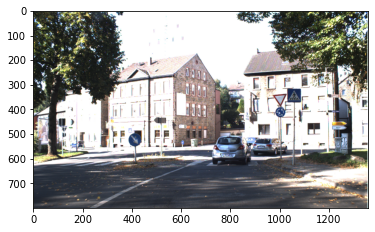

In [4]:
plt.imshow(Image.open(images_df["path"][2]))

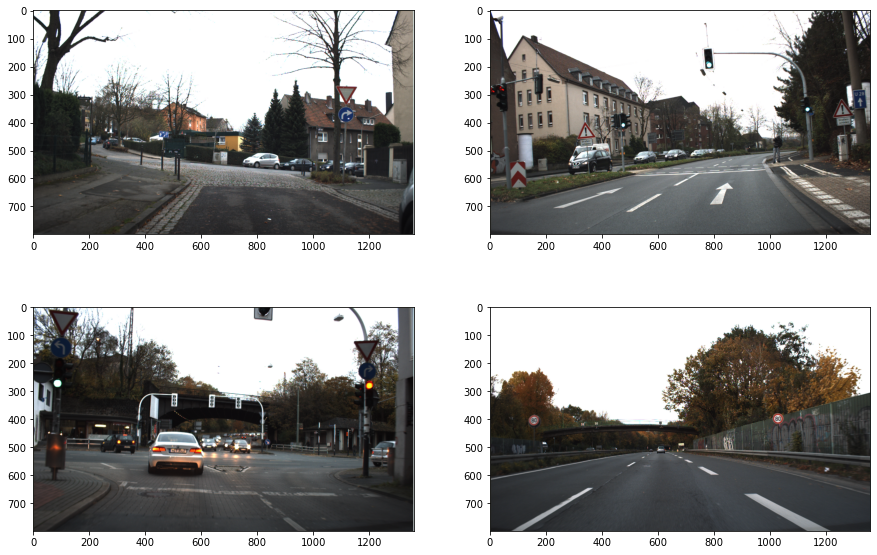

In [5]:
np.random.seed(7)

illustrate = images_df["path"].sample(4).tolist()

fig, axs = plt.subplots(2,2, figsize=(15,10))
axs[0,0].imshow(Image.open(illustrate[0]))
axs[0,1].imshow(Image.open(illustrate[1]))
axs[1,0].imshow(Image.open(illustrate[2]))
axs[1,1].imshow(Image.open(illustrate[3]))

In [6]:
np.array(Image.open(illustrate[1])).shape

(800, 1360, 3)

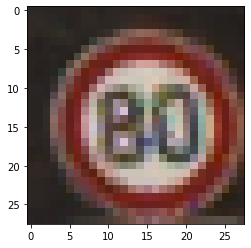

In [105]:
plt.imshow(Image.open("./data/TrainIJCNN2013/TrainIJCNN2013/05/00010.ppm"))

In [110]:
np.array(Image.open("./data/TrainIJCNN2013/TrainIJCNN2013/00/00002.ppm")).shape

(65, 65, 3)

In [ ]:
plt.imshow(Image.open("./data/TestIJCNN2013/TestIJCNN2013Download/00100.ppm"))

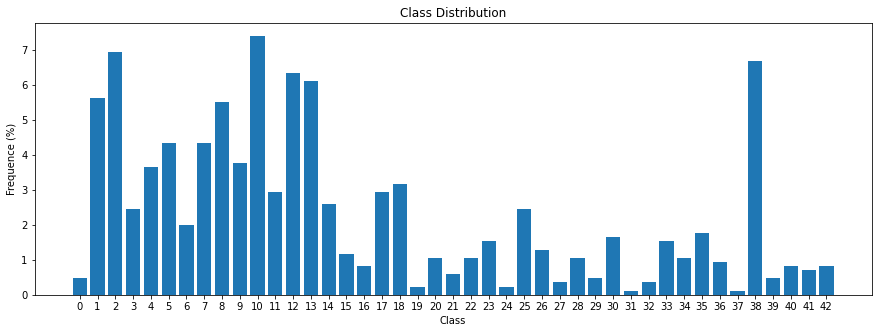

In [9]:
plt.figure(figsize=(15,5))
plt.bar(images_df['ClassId'].value_counts().index.tolist(),images_df['ClassId'].value_counts(normalize = True)*100)

CLASS_COUNT = len(images_df['ClassId'].value_counts())
plt.xticks(range(CLASS_COUNT),range(CLASS_COUNT))
plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('Frequence (%)')
plt.show()

In [10]:
#recode categories

prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 16] #(circular, white ground with red border)
mandatory = [33, 34, 35, 36, 37, 38, 39, 40] #(circular, blue ground)
danger = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31] #(triangular, white ground with red border)
other = [6,12,13,14,17,32,41,42]

conditions = [(images_df["ClassId"].isin(prohibitory)),
               (images_df["ClassId"].isin(mandatory)),
                (images_df["ClassId"].isin(danger)),
                (images_df["ClassId"].isin(other))]
                
choices1 = [0,1,2,3]
choices2 = ["prohibitory","mandatory","danger","other"]

images_df['New_ClassId'] = np.select(conditions, choices1)
images_df['Name'] = np.select(conditions, choices2)

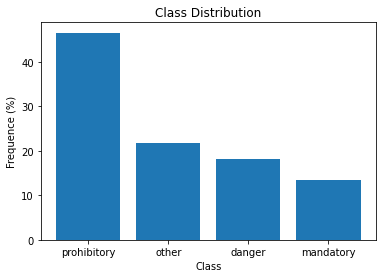

In [11]:
plt.bar(images_df['Name'].value_counts().index.tolist(),images_df['Name'].value_counts(normalize = True)*100)

plt.title("Class Distribution")
plt.xlabel('Class')
plt.ylabel('Frequence (%)')
plt.show()

Text(0.5, 1.0, 'distribution of size of bounding box')

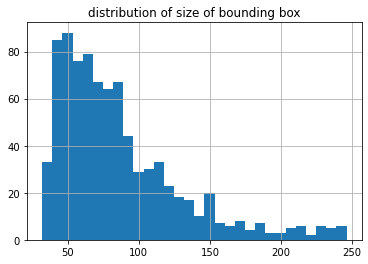

In [12]:
(images_df['rightCol'] - images_df['leftCol'] + images_df['bottomRow'] - images_df['topRow']).hist(bins=30)
plt.title('distribution of size of bounding box')

Most of the boxes lie in 40 to 150 pixel range

In [13]:
images_df.loc[images_df['Filename'] == "00001.ppm"]

Filename  leftCol  topRow  rightCol  bottomRow  ClassId  \
0  00001.ppm      983     388      1024        432       40   
1  00001.ppm      386     494       442        552       38   
2  00001.ppm      973     335      1031        390       13   

                                             path  New_ClassId       Name  
0  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1  mandatory  
1  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1  mandatory  
2  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            3      other

In [22]:
"""
# Using os.walk for going through all directories
# and files in them from the current directory
import os
import cv2
path_dir="./data/TrainIJCNN2013/TrainIJCNN2013/"
final_df=pd.DataFrame(columns=images_df.columns)
for current_dir, dirs, files in os.walk(path_dir):
    for f in files:
        #print(f)
        #Check if a file end with .ppm format or not
        if f.endswith('.ppm'):
            image_name=f[:-4]
            img=cv2.imread(path_dir + f)
            single_yolo_dat = images_df.loc[images_df['path'] == f].copy()
            # and, in this way, initial dataFrame will not be changed
            # Checking if there is no any annotations for current image
            if single_yolo_dat.isnull().values.all():
                # Removing this image from train data
                # print(f)
                os.remove(path_dir + '/' + f)
                
            #Now save the resulted_frame to a folder inside path_dir
            else:
              final_df=final_df.append(single_yolo_dat)
              #Now writng and saving the image from ppm format to jpg format using OpenCV
              save_path = '/content/images' + '/' + image_name + '.jpg'
              cv2.imwrite(save_path, img)
final_df = final_df[~final_df.index.duplicated(keep='first')]
final_df.sort_index(inplace=True)"""

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: './data/TrainIJCNN2013/TrainIJCNN2013//00000.ppm'

In [26]:
from os import walk, makedirs
for (dirpath, dirnames, filenames) in walk("D:\\Cours M2\\Nouveau dossier2"):
    print([dirpath, dirnames, filenames])
    print()

['D:\\Cours M2\\Nouveau dossier2', ['Modèle censuré tronqué', 'Modèle transition et durée', 'Nonlinearand multivariteTime Series', 'outil des big data_ mignot_ magistère', 'Programmation pour les big data_master_uniquement', 'Projet_Cours Hervé Mignot _ magistère', 'sas for big data _ magistère'], ['dossier.pdf']]

['D:\\Cours M2\\Nouveau dossier2\\Modèle censuré tronqué', ['for proofs'], ['Adult_W1_Anon_V5.3.dta', 'beginning.do', 'Censtrunc_ch1_jan21.pdf', 'Censtrunc_ch2_jan21.pdf', 'Censtrunc_ch3_feb21.pdf', 'Censtrunc_ch4_feb21.pdf', 'Censtrunc_ch5_mar21.pdf', 'Censtrunc_ch6.pdf', 'devoir.pdf', 'ESPERANCE MATHEMATIQUE.pdf', 'exam_april2021_atdistance.pdf', 'exam_march2020_cen.pdf', 'First Question.docx', 'graph_correlation_ch1.pdf', 'hhderived_W1_Anon_V5.3.dta', 'panel data ecom francais ch1.pdf', 'pgmCT1.do', 'Test.docx', 'The Stata Blog » Understanding truncation and censoring.pdf']]

['D:\\Cours M2\\Nouveau dossier2\\Modèle censuré tronqué\\for proofs', [], ['0802.0536.pdf', 'Asy

In [14]:
#convert into jpg
#https://github.com/Minali24/Traffic-Sign-Recognition-and-Detection-Using-YOLO

folder = "Im"
mypath = "./data/TrainIJCNN2013/TrainIJCNN2013/"
save_path = "./data/TrainIJCNN2013/train_jpg/"

files = []
for (dirpath, dirnames, filenames) in walk(mypath):
    files += list(map(lambda x: dirpath+"/"+x,filenames))

files = [f for f in files if f.endswith(".ppm")]

count=1
for i in files:
    im = Image.open(i)
    save_file_name = save_path + '/' + ((i.split('/',4)[-1]).split(".")[0]) + ".jpg"
    
    directory = i.split('/')[-2]
    if directory != folder:
        directory = save_path+"/"+directory
        if not exists(directory):
            print(directory)
            makedirs(directory)

    im.save(save_file_name)
    print("File #",count,":",save_file_name)
    count+=1

./data/TrainIJCNN2013/train_jpg//
File # 1 : ./data/TrainIJCNN2013/train_jpg///00000.jpg
File # 2 : ./data/TrainIJCNN2013/train_jpg///00001.jpg
File # 3 : ./data/TrainIJCNN2013/train_jpg///00002.jpg
File # 4 : ./data/TrainIJCNN2013/train_jpg///00003.jpg
File # 5 : ./data/TrainIJCNN2013/train_jpg///00004.jpg
File # 6 : ./data/TrainIJCNN2013/train_jpg///00005.jpg
File # 7 : ./data/TrainIJCNN2013/train_jpg///00006.jpg
File # 8 : ./data/TrainIJCNN2013/train_jpg///00007.jpg
File # 9 : ./data/TrainIJCNN2013/train_jpg///00008.jpg
File # 10 : ./data/TrainIJCNN2013/train_jpg///00009.jpg
File # 11 : ./data/TrainIJCNN2013/train_jpg///00010.jpg
File # 12 : ./data/TrainIJCNN2013/train_jpg///00011.jpg
File # 13 : ./data/TrainIJCNN2013/train_jpg///00012.jpg
File # 14 : ./data/TrainIJCNN2013/train_jpg///00013.jpg
File # 15 : ./data/TrainIJCNN2013/train_jpg///00014.jpg
File # 16 : ./data/TrainIJCNN2013/train_jpg///00015.jpg
File # 17 : ./data/TrainIJCNN2013/train_jpg///00016.jpg
File # 18 : ./data/Trai

File # 147 : ./data/TrainIJCNN2013/train_jpg///00146.jpg
File # 148 : ./data/TrainIJCNN2013/train_jpg///00147.jpg
File # 149 : ./data/TrainIJCNN2013/train_jpg///00148.jpg
File # 150 : ./data/TrainIJCNN2013/train_jpg///00149.jpg
File # 151 : ./data/TrainIJCNN2013/train_jpg///00150.jpg
File # 152 : ./data/TrainIJCNN2013/train_jpg///00151.jpg
File # 153 : ./data/TrainIJCNN2013/train_jpg///00152.jpg
File # 154 : ./data/TrainIJCNN2013/train_jpg///00153.jpg
File # 155 : ./data/TrainIJCNN2013/train_jpg///00154.jpg
File # 156 : ./data/TrainIJCNN2013/train_jpg///00155.jpg
File # 157 : ./data/TrainIJCNN2013/train_jpg///00156.jpg
File # 158 : ./data/TrainIJCNN2013/train_jpg///00157.jpg
File # 159 : ./data/TrainIJCNN2013/train_jpg///00158.jpg
File # 160 : ./data/TrainIJCNN2013/train_jpg///00159.jpg
File # 161 : ./data/TrainIJCNN2013/train_jpg///00160.jpg
File # 162 : ./data/TrainIJCNN2013/train_jpg///00161.jpg
File # 163 : ./data/TrainIJCNN2013/train_jpg///00162.jpg
File # 164 : ./data/TrainIJCNN2

File # 292 : ./data/TrainIJCNN2013/train_jpg///00291.jpg
File # 293 : ./data/TrainIJCNN2013/train_jpg///00292.jpg
File # 294 : ./data/TrainIJCNN2013/train_jpg///00293.jpg
File # 295 : ./data/TrainIJCNN2013/train_jpg///00294.jpg
File # 296 : ./data/TrainIJCNN2013/train_jpg///00295.jpg
File # 297 : ./data/TrainIJCNN2013/train_jpg///00296.jpg
File # 298 : ./data/TrainIJCNN2013/train_jpg///00297.jpg
File # 299 : ./data/TrainIJCNN2013/train_jpg///00298.jpg
File # 300 : ./data/TrainIJCNN2013/train_jpg///00299.jpg
File # 301 : ./data/TrainIJCNN2013/train_jpg///00300.jpg
File # 302 : ./data/TrainIJCNN2013/train_jpg///00301.jpg
File # 303 : ./data/TrainIJCNN2013/train_jpg///00302.jpg
File # 304 : ./data/TrainIJCNN2013/train_jpg///00303.jpg
File # 305 : ./data/TrainIJCNN2013/train_jpg///00304.jpg
File # 306 : ./data/TrainIJCNN2013/train_jpg///00305.jpg
File # 307 : ./data/TrainIJCNN2013/train_jpg///00306.jpg
File # 308 : ./data/TrainIJCNN2013/train_jpg///00307.jpg
File # 309 : ./data/TrainIJCNN2

File # 438 : ./data/TrainIJCNN2013/train_jpg///00437.jpg
File # 439 : ./data/TrainIJCNN2013/train_jpg///00438.jpg
File # 440 : ./data/TrainIJCNN2013/train_jpg///00439.jpg
File # 441 : ./data/TrainIJCNN2013/train_jpg///00440.jpg
File # 442 : ./data/TrainIJCNN2013/train_jpg///00441.jpg
File # 443 : ./data/TrainIJCNN2013/train_jpg///00442.jpg
File # 444 : ./data/TrainIJCNN2013/train_jpg///00443.jpg
File # 445 : ./data/TrainIJCNN2013/train_jpg///00444.jpg
File # 446 : ./data/TrainIJCNN2013/train_jpg///00445.jpg
File # 447 : ./data/TrainIJCNN2013/train_jpg///00446.jpg
File # 448 : ./data/TrainIJCNN2013/train_jpg///00447.jpg
File # 449 : ./data/TrainIJCNN2013/train_jpg///00448.jpg
File # 450 : ./data/TrainIJCNN2013/train_jpg///00449.jpg
File # 451 : ./data/TrainIJCNN2013/train_jpg///00450.jpg
File # 452 : ./data/TrainIJCNN2013/train_jpg///00451.jpg
File # 453 : ./data/TrainIJCNN2013/train_jpg///00452.jpg
File # 454 : ./data/TrainIJCNN2013/train_jpg///00453.jpg
File # 455 : ./data/TrainIJCNN2

File # 584 : ./data/TrainIJCNN2013/train_jpg///00583.jpg
File # 585 : ./data/TrainIJCNN2013/train_jpg///00584.jpg
File # 586 : ./data/TrainIJCNN2013/train_jpg///00585.jpg
File # 587 : ./data/TrainIJCNN2013/train_jpg///00586.jpg
File # 588 : ./data/TrainIJCNN2013/train_jpg///00587.jpg
File # 589 : ./data/TrainIJCNN2013/train_jpg///00588.jpg
File # 590 : ./data/TrainIJCNN2013/train_jpg///00589.jpg
File # 591 : ./data/TrainIJCNN2013/train_jpg///00590.jpg
File # 592 : ./data/TrainIJCNN2013/train_jpg///00591.jpg
File # 593 : ./data/TrainIJCNN2013/train_jpg///00592.jpg
File # 594 : ./data/TrainIJCNN2013/train_jpg///00593.jpg
File # 595 : ./data/TrainIJCNN2013/train_jpg///00594.jpg
File # 596 : ./data/TrainIJCNN2013/train_jpg///00595.jpg
File # 597 : ./data/TrainIJCNN2013/train_jpg///00596.jpg
File # 598 : ./data/TrainIJCNN2013/train_jpg///00597.jpg
File # 599 : ./data/TrainIJCNN2013/train_jpg///00598.jpg
File # 600 : ./data/TrainIJCNN2013/train_jpg///00599.jpg
./data/TrainIJCNN2013/train_jpg

File # 750 : ./data/TrainIJCNN2013/train_jpg//04/00017.jpg
File # 751 : ./data/TrainIJCNN2013/train_jpg//04/00018.jpg
File # 752 : ./data/TrainIJCNN2013/train_jpg//04/00019.jpg
File # 753 : ./data/TrainIJCNN2013/train_jpg//04/00020.jpg
File # 754 : ./data/TrainIJCNN2013/train_jpg//04/00021.jpg
File # 755 : ./data/TrainIJCNN2013/train_jpg//04/00022.jpg
File # 756 : ./data/TrainIJCNN2013/train_jpg//04/00023.jpg
File # 757 : ./data/TrainIJCNN2013/train_jpg//04/00024.jpg
File # 758 : ./data/TrainIJCNN2013/train_jpg//04/00025.jpg
File # 759 : ./data/TrainIJCNN2013/train_jpg//04/00026.jpg
File # 760 : ./data/TrainIJCNN2013/train_jpg//04/00027.jpg
File # 761 : ./data/TrainIJCNN2013/train_jpg//04/00028.jpg
File # 762 : ./data/TrainIJCNN2013/train_jpg//04/00029.jpg
File # 763 : ./data/TrainIJCNN2013/train_jpg//04/00030.jpg
./data/TrainIJCNN2013/train_jpg//05
File # 764 : ./data/TrainIJCNN2013/train_jpg//05/00000.jpg
File # 765 : ./data/TrainIJCNN2013/train_jpg//05/00001.jpg
File # 766 : ./data/

File # 900 : ./data/TrainIJCNN2013/train_jpg//08/00045.jpg
File # 901 : ./data/TrainIJCNN2013/train_jpg//08/00046.jpg
./data/TrainIJCNN2013/train_jpg//09
File # 902 : ./data/TrainIJCNN2013/train_jpg//09/00000.jpg
File # 903 : ./data/TrainIJCNN2013/train_jpg//09/00001.jpg
File # 904 : ./data/TrainIJCNN2013/train_jpg//09/00002.jpg
File # 905 : ./data/TrainIJCNN2013/train_jpg//09/00003.jpg
File # 906 : ./data/TrainIJCNN2013/train_jpg//09/00004.jpg
File # 907 : ./data/TrainIJCNN2013/train_jpg//09/00005.jpg
File # 908 : ./data/TrainIJCNN2013/train_jpg//09/00006.jpg
File # 909 : ./data/TrainIJCNN2013/train_jpg//09/00007.jpg
File # 910 : ./data/TrainIJCNN2013/train_jpg//09/00008.jpg
File # 911 : ./data/TrainIJCNN2013/train_jpg//09/00009.jpg
File # 912 : ./data/TrainIJCNN2013/train_jpg//09/00010.jpg
File # 913 : ./data/TrainIJCNN2013/train_jpg//09/00011.jpg
File # 914 : ./data/TrainIJCNN2013/train_jpg//09/00012.jpg
File # 915 : ./data/TrainIJCNN2013/train_jpg//09/00013.jpg
File # 916 : ./data/

File # 1044 : ./data/TrainIJCNN2013/train_jpg//12/00021.jpg
File # 1045 : ./data/TrainIJCNN2013/train_jpg//12/00022.jpg
File # 1046 : ./data/TrainIJCNN2013/train_jpg//12/00023.jpg
File # 1047 : ./data/TrainIJCNN2013/train_jpg//12/00024.jpg
File # 1048 : ./data/TrainIJCNN2013/train_jpg//12/00025.jpg
File # 1049 : ./data/TrainIJCNN2013/train_jpg//12/00026.jpg
File # 1050 : ./data/TrainIJCNN2013/train_jpg//12/00027.jpg
File # 1051 : ./data/TrainIJCNN2013/train_jpg//12/00028.jpg
File # 1052 : ./data/TrainIJCNN2013/train_jpg//12/00029.jpg
File # 1053 : ./data/TrainIJCNN2013/train_jpg//12/00030.jpg
File # 1054 : ./data/TrainIJCNN2013/train_jpg//12/00031.jpg
File # 1055 : ./data/TrainIJCNN2013/train_jpg//12/00032.jpg
File # 1056 : ./data/TrainIJCNN2013/train_jpg//12/00033.jpg
File # 1057 : ./data/TrainIJCNN2013/train_jpg//12/00034.jpg
File # 1058 : ./data/TrainIJCNN2013/train_jpg//12/00035.jpg
File # 1059 : ./data/TrainIJCNN2013/train_jpg//12/00036.jpg
File # 1060 : ./data/TrainIJCNN2013/trai

File # 1179 : ./data/TrainIJCNN2013/train_jpg//17/00011.jpg
File # 1180 : ./data/TrainIJCNN2013/train_jpg//17/00012.jpg
File # 1181 : ./data/TrainIJCNN2013/train_jpg//17/00013.jpg
File # 1182 : ./data/TrainIJCNN2013/train_jpg//17/00014.jpg
File # 1183 : ./data/TrainIJCNN2013/train_jpg//17/00015.jpg
File # 1184 : ./data/TrainIJCNN2013/train_jpg//17/00016.jpg
File # 1185 : ./data/TrainIJCNN2013/train_jpg//17/00017.jpg
File # 1186 : ./data/TrainIJCNN2013/train_jpg//17/00018.jpg
File # 1187 : ./data/TrainIJCNN2013/train_jpg//17/00019.jpg
File # 1188 : ./data/TrainIJCNN2013/train_jpg//17/00020.jpg
File # 1189 : ./data/TrainIJCNN2013/train_jpg//17/00021.jpg
File # 1190 : ./data/TrainIJCNN2013/train_jpg//17/00022.jpg
File # 1191 : ./data/TrainIJCNN2013/train_jpg//17/00023.jpg
File # 1192 : ./data/TrainIJCNN2013/train_jpg//17/00024.jpg
./data/TrainIJCNN2013/train_jpg//18
File # 1193 : ./data/TrainIJCNN2013/train_jpg//18/00000.jpg
File # 1194 : ./data/TrainIJCNN2013/train_jpg//18/00001.jpg
File

File # 1308 : ./data/TrainIJCNN2013/train_jpg//30/00000.jpg
File # 1309 : ./data/TrainIJCNN2013/train_jpg//30/00001.jpg
File # 1310 : ./data/TrainIJCNN2013/train_jpg//30/00002.jpg
File # 1311 : ./data/TrainIJCNN2013/train_jpg//30/00003.jpg
File # 1312 : ./data/TrainIJCNN2013/train_jpg//30/00004.jpg
File # 1313 : ./data/TrainIJCNN2013/train_jpg//30/00005.jpg
File # 1314 : ./data/TrainIJCNN2013/train_jpg//30/00006.jpg
File # 1315 : ./data/TrainIJCNN2013/train_jpg//30/00007.jpg
File # 1316 : ./data/TrainIJCNN2013/train_jpg//30/00008.jpg
File # 1317 : ./data/TrainIJCNN2013/train_jpg//30/00009.jpg
File # 1318 : ./data/TrainIJCNN2013/train_jpg//30/00010.jpg
File # 1319 : ./data/TrainIJCNN2013/train_jpg//30/00011.jpg
File # 1320 : ./data/TrainIJCNN2013/train_jpg//30/00012.jpg
File # 1321 : ./data/TrainIJCNN2013/train_jpg//30/00013.jpg
./data/TrainIJCNN2013/train_jpg//31
File # 1322 : ./data/TrainIJCNN2013/train_jpg//31/00000.jpg
./data/TrainIJCNN2013/train_jpg//32
File # 1323 : ./data/TrainIJ

In [15]:
##example
a = "./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm"
"./data/TrainIJCNN2013/train_jpg/" + os.path.basename(a).replace(".ppm","")+".jpg"

'./data/TrainIJCNN2013/train_jpg/00001.jpg'

In [17]:
images_df["path2"] = images_df["path"].apply(lambda x : save_path + os.path.basename(x).replace(".ppm","")+".jpg")

In [18]:
images_df.head()

Filename  leftCol  topRow  rightCol  bottomRow  ClassId  \
0  00001.ppm      983     388      1024        432       40   
1  00001.ppm      386     494       442        552       38   
2  00001.ppm      973     335      1031        390       13   
3  00002.ppm      892     476      1006        592       39   
4  00003.ppm      742     443       765        466        4   

                                             path  New_ClassId         Name  \
0  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1    mandatory   
1  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1    mandatory   
2  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            3        other   
3  ./data/TrainIJCNN2013/TrainIJCNN2013/00002.ppm            1    mandatory   
4  ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm            0  prohibitory   

                                       path2  
0  ./data/TrainIJCNN2013/train_jpg/00001.jpg  
1  ./data/TrainIJCNN2013/train_jpg/00001.jpg  
2  ./data/TrainIJCNN2013/train_jpg/00001.jpg  
3  ./data/TrainIJCNN2013/train_jpg/00002.jpg  
4  ./data/TrainIJCNN2013/train_jpg/00003.jpg

In [19]:
liste_images = images_df["path2"].unique().tolist()

In [20]:
len(liste_images) ##there are some images that don't have any traffic sign which are in the TrainIJCNN2013 folder but not in images_df, hence the length is not 600

505

In [43]:
#example
train_label_path = "./data/TrainIJCNN2013/train_set/Label/"
train_label_path + os.path.basename(train_list_path[2]).replace(".jpg","")+ ".txt"

'./data/TrainIJCNN2013/train_set/Label/00003.txt'

In [23]:
random.sample(liste_images, int(0.85*len(liste_images)

['./data/TrainIJCNN2013/train_jpg/00517.jpg']

In [24]:
int(0.85*len(liste_images))

429

In [46]:
# form train set and val set paths
train_rate = 0.85
random.seed(1000)
train_list_path= sorted(random.sample(liste_images, int(0.85*len(liste_images))))
val_list_path = [image for image in filter (lambda x: x not in train_list_path, liste_images)] 

print('nb train image :',len(train_list_path))
print('nb test image :', len(test_list_path))

nb train image : 429
nb test image : 76


In [33]:
"./data/TrainIJCNN2013/train_set/" + os.path.basename(train_list_path[1])

'./data/TrainIJCNN2013/train_set/00002.jpg'

In [34]:
##separate train images and validation image
os.makedirs("./data/TrainIJCNN2013/train_set/")
for image_path in train_list_path:
    shutil.move(image_path, "./data/TrainIJCNN2013/train_set/" + os.path.basename(image_path))

os.makedirs("./data/TrainIJCNN2013/val_set/")
for image_path in val_list_path:
    shutil.move(image_path, "./data/TrainIJCNN2013/val_set/" + os.path.basename(image_path))

In [36]:
#example
images_df.head(1)

Filename  leftCol  topRow  rightCol  bottomRow  ClassId  \
0  00001.ppm      983     388      1024        432       40   

                                             path  New_ClassId       Name  \
0  ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1  mandatory   

                                       path2  
0  ./data/TrainIJCNN2013/train_jpg/00001.jpg

In [47]:
#example
images_df[["Name","leftCol","topRow","rightCol","bottomRow"]][images_df["path2"]==train_list_path[2]]

Name  leftCol  topRow  rightCol  bottomRow
4  prohibitory      742     443       765        466
5  prohibitory      742     466       764        489
6       danger      737     412       769        443

In [51]:
##annotations file for each image
train_label_path = "./data/TrainIJCNN2013/train_set/Label/"
os.makedirs(train_label_path)

val_label_path = "./data/TrainIJCNN2013/val_set/Label/"
os.makedirs(val_label_path)

for image_path in train_list_path:
    df = images_df[["Name","leftCol","topRow","rightCol","bottomRow"]][images_df["path2"]== image_path]
    df.to_csv(train_label_path + os.path.basename(image_path).replace(".jpg",".txt"),sep = " ", header = False,index = False)
    
for image_path in val_list_path:
    df = images_df[["Name","leftCol","topRow","rightCol","bottomRow"]][images_df["path2"]== image_path]
    df.to_csv(val_label_path + os.path.basename(image_path).replace(".jpg",".txt"),sep = " ", header = False,index = False)

In [52]:
folder = "Imt"
mypath = "./data/TestIJCNN2013/"
save_path = "./data/TestIJCNN2013/test_jpg/"

files = []
for (dirpath, dirnames, filenames) in walk(mypath):
    files += list(map(lambda x: dirpath+"/"+x,filenames))

files = [f for f in files if f.endswith(".ppm")]

count=1
for i in files:
    im = Image.open(i)
    save_file_name = save_path + '/' + ((i.split('/',4)[-1]).split(".")[0]) + ".jpg"
    
    directory = i.split('/')[-2]
    if directory != folder:
        directory = save_path+"/"+directory
        if not exists(directory):
            print(directory)
            makedirs(directory)

    im.save(save_file_name)
    print("File #",count,":",save_file_name)
    count+=1

./data/TestIJCNN2013/test_jpg//TestIJCNN2013Download
File # 1 : ./data/TestIJCNN2013/test_jpg//00000.jpg
File # 2 : ./data/TestIJCNN2013/test_jpg//00001.jpg
File # 3 : ./data/TestIJCNN2013/test_jpg//00002.jpg
File # 4 : ./data/TestIJCNN2013/test_jpg//00003.jpg
File # 5 : ./data/TestIJCNN2013/test_jpg//00004.jpg
File # 6 : ./data/TestIJCNN2013/test_jpg//00005.jpg
File # 7 : ./data/TestIJCNN2013/test_jpg//00006.jpg
File # 8 : ./data/TestIJCNN2013/test_jpg//00007.jpg
File # 9 : ./data/TestIJCNN2013/test_jpg//00008.jpg
File # 10 : ./data/TestIJCNN2013/test_jpg//00009.jpg
File # 11 : ./data/TestIJCNN2013/test_jpg//00010.jpg
File # 12 : ./data/TestIJCNN2013/test_jpg//00011.jpg
File # 13 : ./data/TestIJCNN2013/test_jpg//00012.jpg
File # 14 : ./data/TestIJCNN2013/test_jpg//00013.jpg
File # 15 : ./data/TestIJCNN2013/test_jpg//00014.jpg
File # 16 : ./data/TestIJCNN2013/test_jpg//00015.jpg
File # 17 : ./data/TestIJCNN2013/test_jpg//00016.jpg
File # 18 : ./data/TestIJCNN2013/test_jpg//00017.jpg
Fi

File # 154 : ./data/TestIJCNN2013/test_jpg//00153.jpg
File # 155 : ./data/TestIJCNN2013/test_jpg//00154.jpg
File # 156 : ./data/TestIJCNN2013/test_jpg//00155.jpg
File # 157 : ./data/TestIJCNN2013/test_jpg//00156.jpg
File # 158 : ./data/TestIJCNN2013/test_jpg//00157.jpg
File # 159 : ./data/TestIJCNN2013/test_jpg//00158.jpg
File # 160 : ./data/TestIJCNN2013/test_jpg//00159.jpg
File # 161 : ./data/TestIJCNN2013/test_jpg//00160.jpg
File # 162 : ./data/TestIJCNN2013/test_jpg//00161.jpg
File # 163 : ./data/TestIJCNN2013/test_jpg//00162.jpg
File # 164 : ./data/TestIJCNN2013/test_jpg//00163.jpg
File # 165 : ./data/TestIJCNN2013/test_jpg//00164.jpg
File # 166 : ./data/TestIJCNN2013/test_jpg//00165.jpg
File # 167 : ./data/TestIJCNN2013/test_jpg//00166.jpg
File # 168 : ./data/TestIJCNN2013/test_jpg//00167.jpg
File # 169 : ./data/TestIJCNN2013/test_jpg//00168.jpg
File # 170 : ./data/TestIJCNN2013/test_jpg//00169.jpg
File # 171 : ./data/TestIJCNN2013/test_jpg//00170.jpg
File # 172 : ./data/TestIJCN

In [59]:
##create a folder that contain the train set and val set 
dataset_path = "./data/TrainIJCNN2013/Dataset/"
os.makedirs(dataset_path)

shutil.move("./data/TrainIJCNN2013/train_set/", "./data/TrainIJCNN2013/Dataset/train_set/")
shutil.move("./data/TrainIJCNN2013/val_set/", "./data/TrainIJCNN2013/Dataset/val_set/")

general_folder_path = "./data/TrainIJCNN2013/general/"
shutil.move("./data/TrainIJCNN2013/Dataset/", "./data/TrainIJCNN2013/general/Dataset/")

'./data/TrainIJCNN2013/general/Dataset/'

In [60]:
!python oid_to_pascal_voc_xml.py

Currently in Subdirectory: Dataset

Creating PASCAL VOC XML Files for Class: train_set

Creating PASCAL VOC XML Files for Class: val_set



100%|##########| 429/429 [00:13<00:00, 30.93it/s]

100%|##########| 76/76 [00:02<00:00, 33.05it/s]


In [65]:
!python XML_to_YOLOv3.py

C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00001.jpg 983,388,1024,432,0 386,494,442,552,0 973,335,1031,390,1
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00002.jpg 892,476,1006,592,0
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00003.jpg 742,443,765,466,2 742,466,764,489,2 737,412,769,443,3
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00004.jpg 898,342,967,409,3 906,407,955,459,2
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00005.jpg 1172,164,1284,278,2
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00006.jpg 926,350,989,414,2
C:\Users\jeane\Documents\new-hands-on

C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00388.jpg 1274,497,1346,561,1
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00390.jpg 455,502,503,550,2 1219,494,1265,541,2
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00391.jpg 1260,502,1304,551,1 198,508,247,558,1
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00392.jpg 358,443,423,512,2
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00393.jpg 278,484,373,571,3
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00395.jpg 201,519,241,561,1 903,519,938,555,1
C:\Users\jeane\Documents\new-hands-on-2021\notebooks./data/TrainIJCNN2013/general/Dataset/train_set/00397.jpg 949,559,983,593,2 947,524,982,559,2
C:\Users\jeane\Documents\n

In [69]:
images_df.head(11)

Filename  leftCol  topRow  rightCol  bottomRow  ClassId  \
0   00001.ppm      983     388      1024        432       40   
1   00001.ppm      386     494       442        552       38   
2   00001.ppm      973     335      1031        390       13   
3   00002.ppm      892     476      1006        592       39   
4   00003.ppm      742     443       765        466        4   
5   00003.ppm      742     466       764        489        9   
6   00003.ppm      737     412       769        443       21   
7   00004.ppm      898     342       967        409       21   
8   00004.ppm      906     407       955        459        2   
9   00005.ppm     1172     164      1284        278        9   
10  00006.ppm      926     350       989        414        2   

                                              path  New_ClassId         Name  \
0   ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1    mandatory   
1   ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            1    mandatory   
2   ./data/TrainIJCNN2013/TrainIJCNN2013/00001.ppm            3        other   
3   ./data/TrainIJCNN2013/TrainIJCNN2013/00002.ppm            1    mandatory   
4   ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm            0  prohibitory   
5   ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm            0  prohibitory   
6   ./data/TrainIJCNN2013/TrainIJCNN2013/00003.ppm            2       danger   
7   ./data/TrainIJCNN2013/TrainIJCNN2013/00004.ppm            2       danger   
8   ./data/TrainIJCNN2013/TrainIJCNN2013/00004.ppm            0  prohibitory   
9   ./data/TrainIJCNN2013/TrainIJCNN2013/00005.ppm            0  prohibitory   
10  ./data/TrainIJCNN2013/TrainIJCNN2013/00006.ppm            0  prohibitory   

                                        path2  
0   ./data/TrainIJCNN2013/train_jpg/00001.jpg  
1   ./data/TrainIJCNN2013/train_jpg/00001.jpg  
2   ./data/TrainIJCNN2013/train_jpg/00001.jpg  
3   ./data/TrainIJCNN2013/train_jpg/00002.jpg  
4   ./data/TrainIJCNN2013/train_jpg/00003.jpg  
5   ./data/TrainIJCNN2013/train_jpg/00003.jpg  
6   ./data/TrainIJCNN2013/train_jpg/00003.jpg  
7   ./data/TrainIJCNN2013/train_jpg/00004.jpg  
8   ./data/TrainIJCNN2013/train_jpg/00004.jpg  
9   ./data/TrainIJCNN2013/train_jpg/00005.jpg  
10  ./data/TrainIJCNN2013/train_jpg/00006.jpg

We may notice some changes in the labeling. As of now, <br>
mandatory   --> 0 <br>
other       --> 1<br>
prohibitory --> 2<br>
danger      --> 3

In [86]:
!python train.py ##cette exécution a été interompu

^C


In [89]:
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

In [90]:
test_path = "./data/TestIJCNN2013/test_jpg/"

test_list_path = sorted(
    [
        os.path.join(test_path, fname)
        for fname in os.listdir(test_path)
        if fname.endswith(".jpg")
    ]
)

00040.jpg
Wall time: 10.8 s


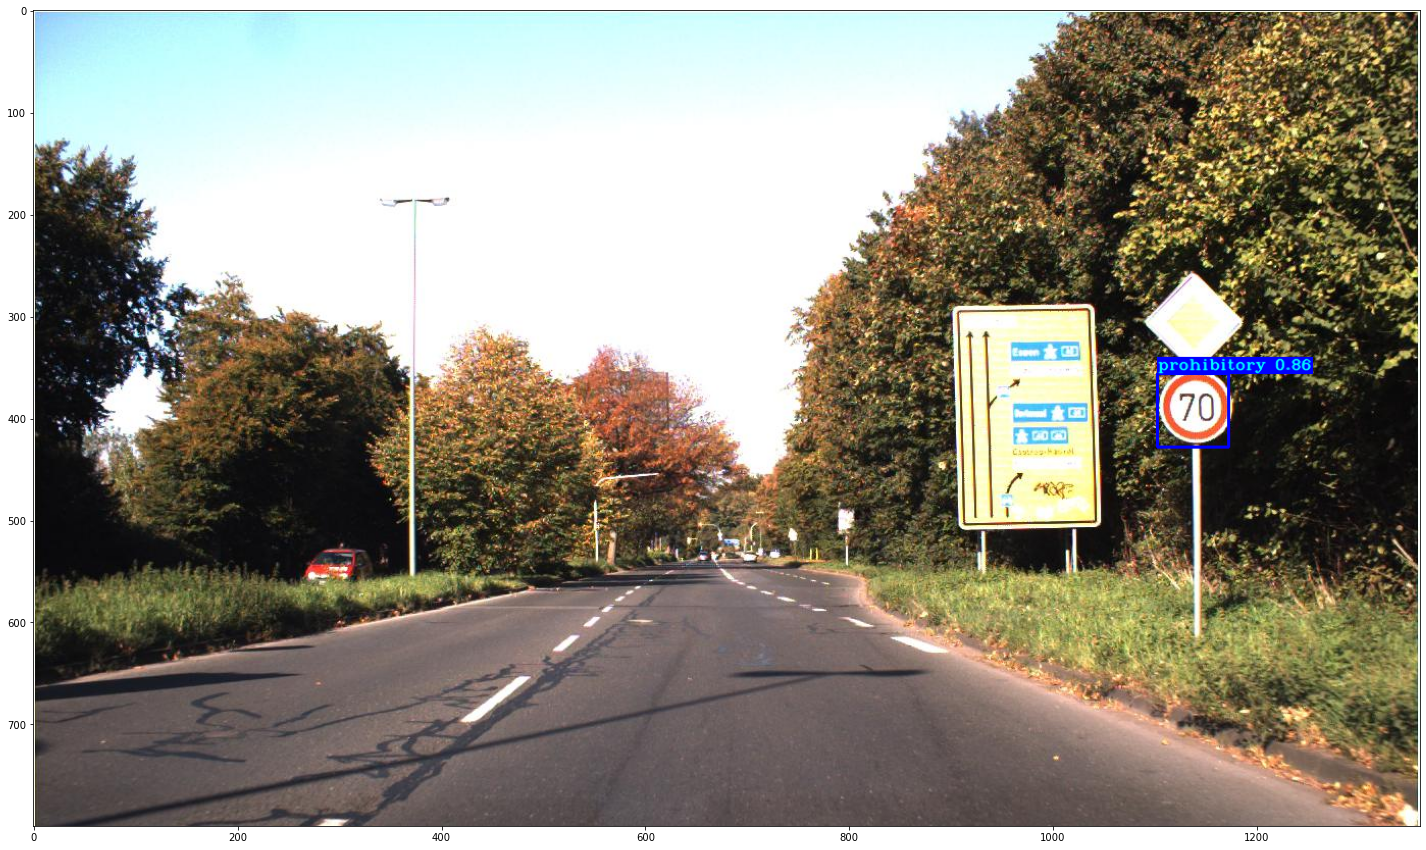

In [100]:
%%time
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

pas assez précis, car on voit qu'il y a un autre panneau de signalisation, qui n'est pas détecté, il faudra modifier des paramètres de modèle pour voir si on aura mieux

00241.jpg
Wall time: 12.4 s


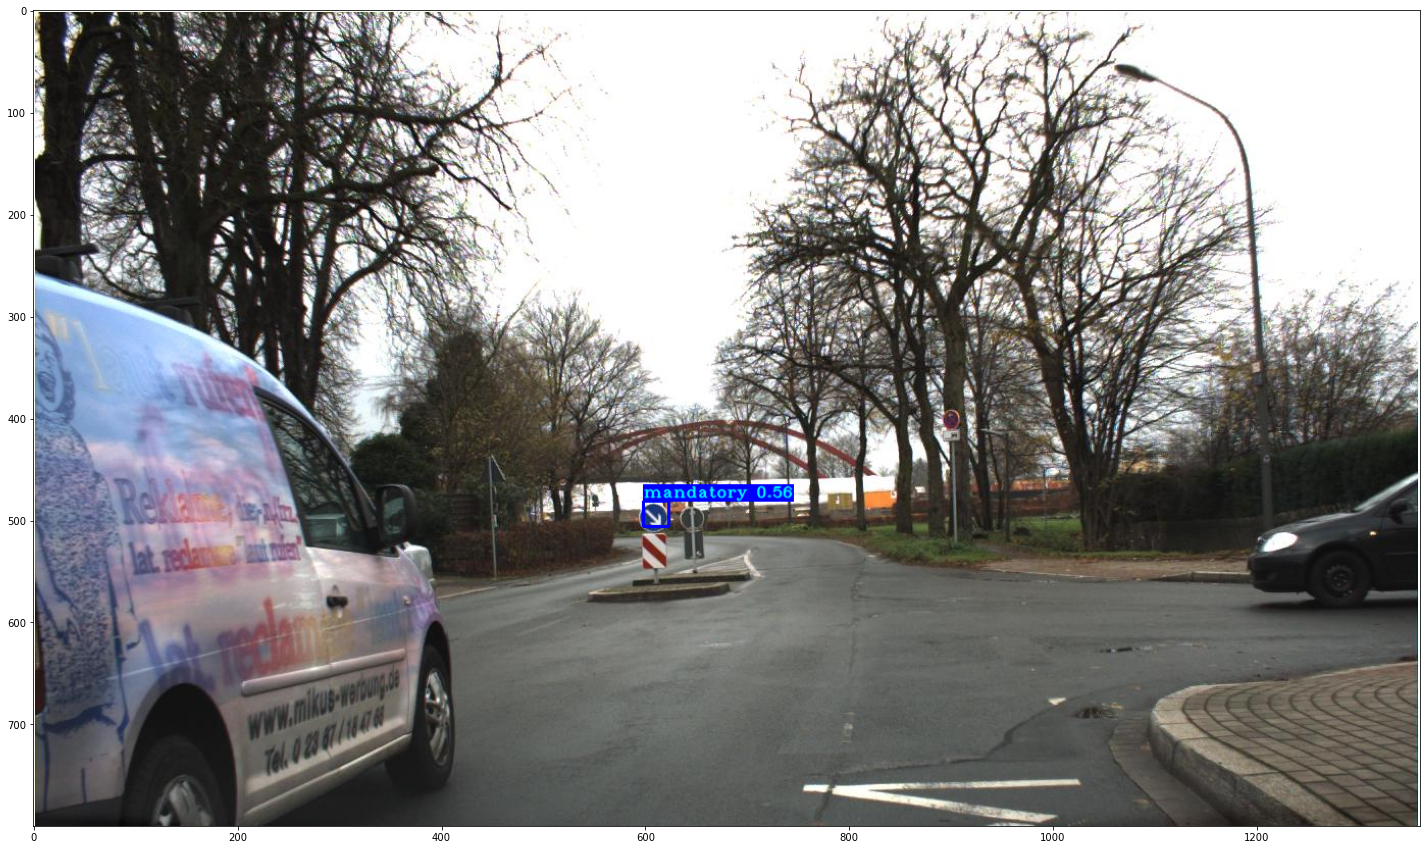

In [101]:
%%time
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

00213.jpg
Wall time: 12.5 s


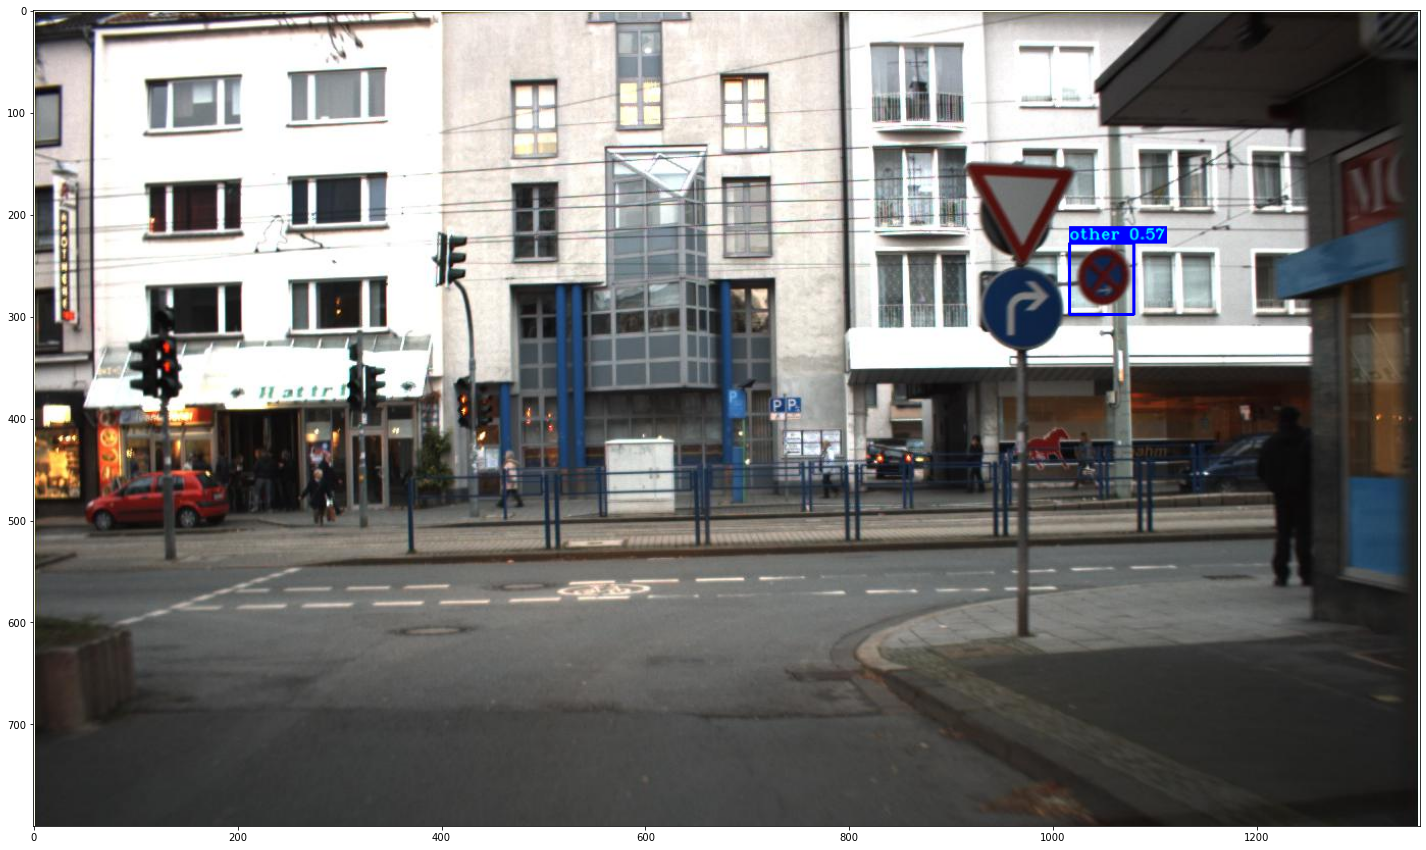

In [102]:
%%time
image_path  = random.sample(test_list_path,k=1)[0]
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(os.path.basename(image_path))
plt.figure(figsize=(30,15))
plt.imshow(image)

Rappel des classes

**prohibitory = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 15, 16]**

0: 'Speed limit (20km/h)' <br> 
1: 'Speed limit (30km/h)' <br>
2: 'Speed limit (50km/h)' <br>
3: 'Speed limit (60km/h)' <br>
4: 'Speed limit (70km/h)' <br>
5: 'Speed limit (80km/h)' <br>
7: 'Speed limit (100km/h)' <br>
8: 'Speed limit (120km/h)' <br>
9: 'No passing' <br>
10: 'No passing veh over 3.5 tons' <br>
15: 'No vehicles' <br>
16: 'Veh > 3.5 tons prohibited' <br>

**mandatory = [33, 34, 35, 36, 37, 38, 39, 40]**

33: 'Turn right ahead' <br>
34: 'Turn left ahead' <br>
35: 'Ahead only' <br>
36: 'Go straight or right' <br>
37: 'Go straight or left' <br>
38: 'Keep right' <br>
39: 'Keep left' <br>
40: 'Roundabout mandatory' <br>

**danger = [11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]**

11: 'Right-of-way at intersection' <br>
18: 'General caution' <br>
19: 'Dangerous curve left' <br>
20: 'Dangerous curve right' <br>
21: 'Double curve' <br>
22: 'Bumpy road' <br>
23: 'Slippery road' <br>
24: 'Road narrows on the right' <br>
25: 'Road work' <br>
26: 'Traffic signals' <br>
27: 'Pedestrians' <br>
28: 'Children crossing' <br>
29: 'Bicycles crossing' <br>
30: 'Beware of ice/snow' <br>
31: 'Wild animals crossing' <br>

**other = [6,12,13,14,17,32,41,42]**

6: 'End of speed limit (80km/h)' <br>
12: 'Priority road' <br>
13: 'Yield' <br>
14: 'Stop' <br>
17: 'No entry' <br>
32: 'End speed + passing limits' <br>
41: 'End of no passing' <br>
42: 'End no passing veh > 3.5 tons' <br>


In [111]:
os.getcwd()

'C:\\Users\\jeane\\Documents\\new-hands-on-2021\\notebooks'

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6542333899275228421
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 13907006973277812560
physical_device_desc: "device: XLA_CPU device"
]
GPUs []
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/19, lr:0.000005, giou_loss:   2.04, conf_loss:1880.67, prob_loss:   4.20, total_loss:1886.91
epoch: 0 step:    3/19, lr:0.000008, giou_loss:   4.83, conf_loss:1338.26, prob_loss:  10.10, total_loss:1353.19
epoch: 0 step:    4/19, lr:0.000011, giou_loss:   4.26, conf_loss:1331.90, prob_loss:  10.32, total_loss:1346.48
epoch: 0 step:    5/19, lr:0.000013, giou_loss:   1.86, conf_loss:1318.58, prob_loss:   4.01, total_loss:1324.44
epoch: 0 step:    6/19, lr:0.000016, giou_loss:   4.33, conf_loss:1301.07, prob_loss:   8.76, total_loss:1314.16
epoch: 0 step:    7/19, lr:0.000018, giou_loss:   4.09, conf_loss:1273.77, prob_loss:

2021-05-01 20:19:34.539434: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-05-01 20:19:34.540737: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-05-01 20:19:45.223591: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-05-01 20:19:45.259114: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2227a64cae0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-01 20:19:45.259177: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-

epoch:61 step:    1/19, lr:0.000065, giou_loss:   0.90, conf_loss:   2.51, prob_loss:   0.45, total_loss:   3.85


giou_val_loss:   0.55, conf_val_loss:   2.44, prob_val_loss:   0.29, total_val_loss:   3.28


epoch:62 step:    2/19, lr:0.000065, giou_loss:   0.44, conf_loss:   2.28, prob_loss:   0.18, total_loss:   2.90
epoch:62 step:    3/19, lr:0.000065, giou_loss:   0.99, conf_loss:   2.58, prob_loss:   0.47, total_loss:   4.04
epoch:62 step:    4/19, lr:0.000065, giou_loss:   0.44, conf_loss:   2.33, prob_loss:   0.20, total_loss:   2.97
epoch:62 step:    5/19, lr:0.000065, giou_loss:   0.34, conf_loss:   2.31, prob_loss:   0.21, total_loss:   2.87
epoch:62 step:    6/19, lr:0.000065, giou_loss:   0.32, conf_loss:   2.32, prob_loss:   0.21, total_loss:   2.84
epoch:62 step:    7/19, lr:0.000065, giou_loss:   0.47, conf_loss:   2.32, prob_loss:   0.24, total_loss:   3.03
epoch:62 step:    8/19, lr:0.000065, giou_loss:   0.53, conf_loss:   2.37, prob_loss:   0.30, total_loss:   3.20


epoch:124 step:    7/19, lr:0.000008, giou_loss:   0.20, conf_loss:   1.17, prob_loss:   0.26, total_loss:   1.63
epoch:124 step:    8/19, lr:0.000008, giou_loss:   0.29, conf_loss:   1.20, prob_loss:   0.37, total_loss:   1.86
epoch:124 step:    9/19, lr:0.000008, giou_loss:   0.19, conf_loss:   1.18, prob_loss:   0.26, total_loss:   1.63
epoch:124 step:   10/19, lr:0.000008, giou_loss:   0.17, conf_loss:   1.15, prob_loss:   0.26, total_loss:   1.58
epoch:124 step:   11/19, lr:0.000008, giou_loss:   0.28, conf_loss:   1.20, prob_loss:   0.39, total_loss:   1.87
epoch:124 step:   12/19, lr:0.000008, giou_loss:   0.09, conf_loss:   1.13, prob_loss:   0.15, total_loss:   1.37
epoch:124 step:   13/19, lr:0.000008, giou_loss:   0.19, conf_loss:   1.13, prob_loss:   0.23, total_loss:   1.54
epoch:124 step:   14/19, lr:0.000008, giou_loss:   0.23, conf_loss:   1.17, prob_loss:   0.30, total_loss:   1.70
epoch:124 step:   15/19, lr:0.000008, giou_loss:   0.34, conf_loss:   1.42, prob_loss:  